In [1]:
## This code tries to analyze the broken regions of the transmembrane protein and see the environment of proteins surrounding them 

In [9]:
import pandas as pd 
import numpy as np 
import json
import csv
import matplotlib.pyplot as plt



In [10]:
broken_membrane_dir = "../outputs/brokenHelix/"
broken_membrane_report =  open('../outputs/brokenHelix/concise_report.json')
broken_membrane_report= json.load(broken_membrane_report)
del broken_membrane_report[-1] ## run this only once 

In [28]:
res_count_dict = {};
broken_res_dict={};
neighbour_res_dict={};
total_helix_count =0 ; 
broken_helix_count = 0 ; 
broken_res_count =0 ; 
total_protein_count = 0; 
protein_with_break_in_H_bond = 0 ; 
for ind_report in broken_membrane_report:
    total_protein_count =total_protein_count + 1 
    broken_flag =0 ;
    helix_list = ind_report['helices'];
    for ind_helix in helix_list: 
        main_chain_res = ind_helix['membrane_bound_residues'];
        if(len(main_chain_res) > 0):
            total_helix_count = total_helix_count + 1; 
            prev_res_no = -1 ; 
            for ind_res in main_chain_res:
                res_no = int(ind_res[22:26])
                res_name = ind_res[17:20]
                if(res_no != prev_res_no):
                    if(res_name not in res_count_dict.keys()):
                        res_count_dict[res_name]= 1;
                    else:
                        res_count_dict[res_name]= res_count_dict[res_name] + 1; 
                    prev_res_no= res_no;
            broken_regions = ind_helix['broken_regions']; 

            if(len(broken_regions)):
                broken_res_count= broken_res_count + len(broken_regions);
                broken_helix_count = broken_helix_count + 1; 
                broken_flag = 1; 
                ind =0;
                prev_res_name = '';
                push_next =0; 

                for ind_res in main_chain_res:
                    res_no = int(ind_res[22:26]);
                    res_name = ind_res[17:20];

                    while((ind <  len(broken_regions)) and res_no > broken_regions[ind]  ):
                        ind = ind +1 ; 
                        
                    if(ind >= len(broken_regions) ):
                        break;
                    if(push_next ):
                        if(res_name not in neighbour_res_dict.keys()):
                            neighbour_res_dict[res_name]= 0;
                            push_next =1; 
                        else:
                            neighbour_res_dict[res_name]= neighbour_res_dict[res_name] + 1; 
                            push_next =1; 
                        push_next= 0 ;
                        
                    if(res_no==broken_regions[ind]):
                        ind = ind + 1; 
                        push_next =1; 
                        
                        if(res_name not in broken_res_dict.keys()):
                            broken_res_dict[res_name]= 0;
                        else:
                            broken_res_dict[res_name]= broken_res_dict[res_name] + 1; 

                        if(prev_res_name not in neighbour_res_dict.keys()):
                            neighbour_res_dict[prev_res_name]= 0;
                        else:
                            neighbour_res_dict[prev_res_name]= neighbour_res_dict[prev_res_name] + 1; 
                        prev_res1 = '';
                        end_res = res_no + 4; 
                        for ind_res1 in main_chain_res:
                            res_no1 = int(ind_res1[22:26]);
                            res_name1 = ind_res1[17:20];
                            if(end_res  == res_no1):
                                if(res_name1 not in broken_res_dict.keys()):
                                    broken_res_dict[res_name1]= 0;
                                else:
                                    broken_res_dict[res_name1]= broken_res_dict[res_name1] + 1;
        
                                if(prev_res_name not in neighbour_res_dict.keys()):
                                    neighbour_res_dict[prev_res_name]= 0;
                                else:
                                    neighbour_res_dict[prev_res_name]= neighbour_res_dict[prev_res_name] + 1; 
                                break;
                            prev_res1= res_no1; 
                    prev_res_name = res_name;
    if(broken_flag):
        protein_with_break_in_H_bond = protein_with_break_in_H_bond + 1
                       
            
            



In [29]:
del neighbour_res_dict['']


In [30]:
percent_broken_dict ={};
neighbour_percent_broken_dict={};
for res_name in broken_res_dict.keys():
    percent_broken_dict[res_name] = broken_res_dict[res_name]*100/res_count_dict[res_name];
for res_name in neighbour_res_dict.keys():
    neighbour_percent_broken_dict[res_name] = neighbour_res_dict[res_name]*100/res_count_dict[res_name];
print("Total number of proteins",total_protein_count )
print("proteins with broken H bond",protein_with_break_in_H_bond)
print("Total number of transmembrane helices ",total_helix_count )
print("Total number of  helices ",total_helix_count )

print("Total number of broken helices ",broken_helix_count )
print('Percent of helices broken ', (broken_helix_count/total_helix_count) * 100 );


Total number of proteins 663
proteins with broken H bond 652
Total number of transmembrane helices  21180
Total number of  helices  21180
Total number of broken helices  14028
Percent of helices broken  66.23229461756374


In [31]:
res_count_dict = dict(sorted(res_count_dict.items(), key=lambda kv: kv[1]))
percent_broken_dict = dict(sorted(percent_broken_dict.items(), key=lambda kv: kv[1]))
broken_res_dict = dict(sorted(broken_res_dict.items(), key=lambda kv: kv[1]))
neighbour_percent_broken_dict=dict(sorted(neighbour_percent_broken_dict.items(), key=lambda kv: kv[1]))


Text(0.5, 1.0, 'Distribution of Number of amino acids in transmembrane helices')

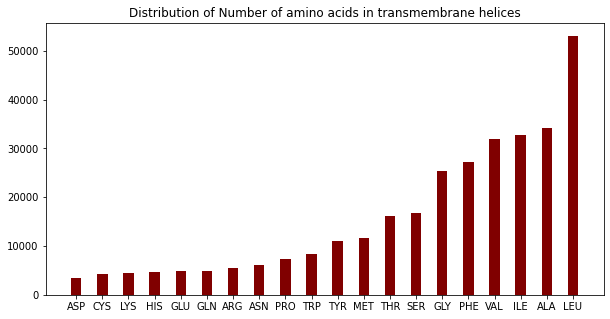

In [32]:
import matplotlib.pyplot as plt
amino_acid_labels = res_count_dict.keys();
percent_in_database = res_count_dict.values();
fig = plt.figure(figsize = (10, 5))
plt.bar(amino_acid_labels, percent_in_database, color ='maroon',
        width = 0.4)
ax = plt.gca()

ax.set_title("Distribution of Number of amino acids in transmembrane helices")


Text(0.5, 1.0, 'Number of amino acids in broken regions of helices')

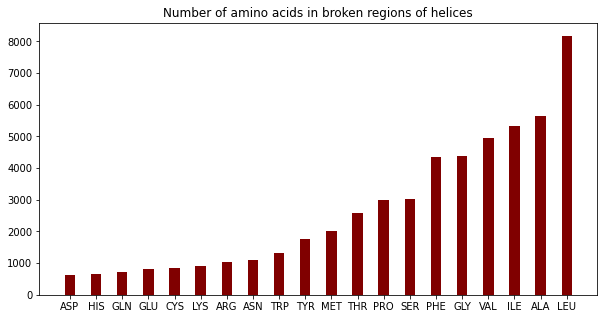

In [33]:
import matplotlib.pyplot as plt
amino_acid_labels = broken_res_dict.keys();
number_in_broken_regions = broken_res_dict.values();
fig = plt.figure(figsize = (10, 5))
plt.bar(amino_acid_labels, number_in_broken_regions, color ='maroon',
        width = 0.4)
ax = plt.gca()
ax.set_title("Number of amino acids in broken regions of helices")



Text(0.5, 1.0, 'Persent of amino acid involved in broken H Bond formation')

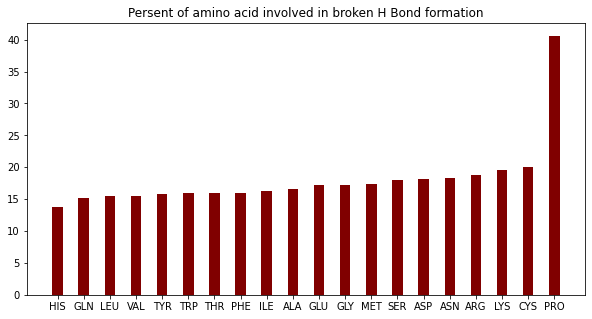

In [34]:
amino_acid_labels = percent_broken_dict.keys();
percent_in_kink = percent_broken_dict.values();
fig = plt.figure(figsize = (10, 5))
plt.bar(amino_acid_labels, percent_in_kink, color ='maroon',
        width = 0.4)
ax = plt.gca()
ax.set_title("Persent of amino acid involved in broken H Bond formation")

# report top 5 residues involved in broken hydorgen bonds

Text(0.5, 1.0, 'Persent of amino acid involved in residues neighbouring broken H Bond ')

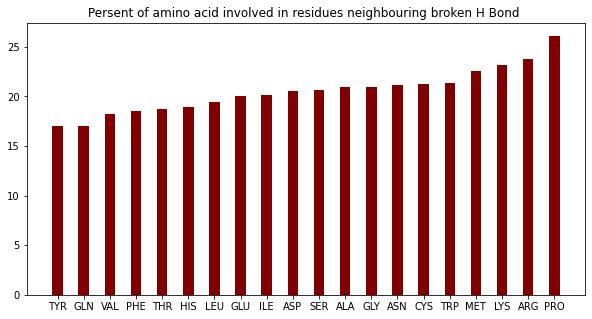

In [35]:
amino_acid_labels = neighbour_percent_broken_dict.keys();
neighbour_percent_in_kink = neighbour_percent_broken_dict.values();
fig = plt.figure(figsize = (10, 5))
plt.bar(amino_acid_labels, neighbour_percent_in_kink, color ='maroon',
        width = 0.4)
ax = plt.gca()
ax.set_title("Persent of amino acid involved in residues neighbouring broken H Bond ")

# report top 5 residues involved in broken   hydrogen bond

In [36]:
neighbour_percent_broken_dict

{'TYR': 16.980113380725278,
 'GLN': 17.05346042271032,
 'VAL': 18.217066383165005,
 'PHE': 18.507933018211133,
 'THR': 18.759632575057026,
 'HIS': 18.95744680851064,
 'LEU': 19.482209190504026,
 'GLU': 20.04991680532446,
 'ILE': 20.193574075775675,
 'ASP': 20.574304322084075,
 'SER': 20.682897862232778,
 'ALA': 20.941286934068835,
 'GLY': 20.9451989892609,
 'ASN': 21.20253164556962,
 'CYS': 21.274094969440526,
 'TRP': 21.406986582859904,
 'MET': 22.603327045103757,
 'LYS': 23.20684360605396,
 'ARG': 23.82331643736423,
 'PRO': 26.10343893853236}

### Check interation of broken regions with other main chain residues in the same helix as well as different helix 
### repeat this for main chain - side chain interactions 

In [37]:
def getCoordinateList(atom_record):
    #returns the X, Y, Z coordinates in the form of a list 
    xCoord = float(atom_record[30:38]);
    yCoord = float(atom_record[38:46]);
    zCoord = float(atom_record[46:54]);
    return [xCoord, yCoord, zCoord];

In [45]:
three_helix_count =0 ; 
pi_helix_count=0 ; 
six_helix_count =0;
three_helix_residue_name = []
pi_helix_residue_name = []

protein_with_three_helix = 0 ; 
protein_with_pi_helix =0 ;
for ind_report in broken_membrane_report:
   # print(ind_report['pdb_id'])
    helix_list = ind_report['helices'];
    three_helix_flag =0 ; 
    pi_helix_flag =0 ; 
    for i,ind_helix in enumerate(helix_list): 
      
        main_chain_res = ind_helix['membrane_bound_residues'];
        if(len(main_chain_res) > 0):
            broken_regions = ind_helix['broken_regions']; 
            if(len(broken_regions)):
                ind =0;    
                for ind_res in main_chain_res:
                    res_no = int(ind_res[22:26]);
                    res_name = ind_res[17:20];

                    while((ind <  len(broken_regions)) and res_no > broken_regions[ind] ):
                        ind = ind +1 ; 
                    if(ind >= len(broken_regions) ):
                        break;

                    if(res_no==broken_regions[ind]):
                        ind = ind +1 ; 
                        for ind_res1 in main_chain_res:
                            res_no1 = int(ind_res1[22:26]);
                            res_name1 = ind_res1[17:20];
                            atom_name = ind_res1[13:14]
                            if(atom_name == 'O' and res_no1 == res_no):
                                acceptor_res = ind_res1;
                                res_x_coord , res_y_coord,res_z_coord = getCoordinateList(ind_res1)

                            if(atom_name == 'N' and res_no1 == res_no +3):  # 3 10 helix is present
                                donor_res = ind_res1;
                                #print(acceptor_res, donor_res)
                                res1_x_coord , res1_y_coord,res1_z_coord = getCoordinateList(ind_res1)
                                donor_point= np.array((res1_x_coord, res1_y_coord, res1_z_coord));
                                acceptor_point =  np.array((res_x_coord, res_y_coord, res_z_coord));
                                dist = np.linalg.norm(acceptor_point - donor_point);  # calculates the distance between the donor and acceptor atoms
                                if(dist < 3.5 ): # H bond criteria for helix
                                    three_helix_residue_name.append(res_name)
                                    three_helix_count = three_helix_count + 1; 
                                    three_helix_flag =1;
                                    
                            if(atom_name == 'N' and res_no1 == res_no +5):# pi helix is present
                                donor_res = ind_res1;
                                #print(acceptor_res, donor_res)
                                res1_x_coord , res1_y_coord,res1_z_coord = getCoordinateList(ind_res1)
                                donor_point= np.array((res1_x_coord, res1_y_coord, res1_z_coord));
                                acceptor_point =  np.array((res_x_coord, res_y_coord, res_z_coord));
                                dist = np.linalg.norm(acceptor_point - donor_point);  # calculates the distance between the donor and acceptor atoms
                                if(dist < 3.5 ): # H bond criteria for helix
                                    pi_helix_residue_name.append(res_name)
                                    pi_helix_count = pi_helix_count + 1; 
                                    pi_helix_flag =1; 
                            if(atom_name == 'N' and res_no1 == res_no +6):# pi helix is present
                                donor_res = ind_res1;
                                #print(acceptor_res, donor_res)
                                res1_x_coord , res1_y_coord,res1_z_coord = getCoordinateList(ind_res1)
                                donor_point= np.array((res1_x_coord, res1_y_coord, res1_z_coord));
                                acceptor_point =  np.array((res_x_coord, res_y_coord, res_z_coord));
                                dist = np.linalg.norm(acceptor_point - donor_point);  # calculates the distance between the donor and acceptor atoms
                                if(dist < 3.5 ): # H bond criteria for helix
                                    six_helix_count = pi_helix_count + 1; 
    helix_list[i]= ind_helix;
    if(pi_helix_flag):
        protein_with_pi_helix = protein_with_pi_helix +1; 
    if(three_helix_flag):
        protein_with_three_helix = protein_with_three_helix +1 ;

<BarContainer object of 6794 artists>

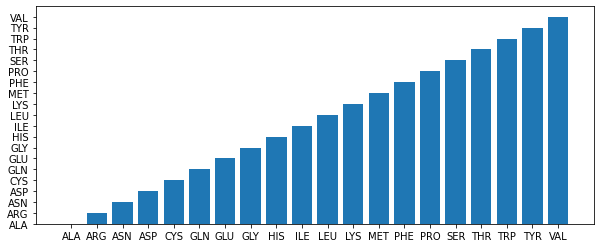

In [49]:
three_helix_residue_name.sort()
three_helix_residue_name
from matplotlib import pyplot as plt

plt.bar(three_helix_residue_name, three_helix_residue_name)


<BarContainer object of 20 artists>

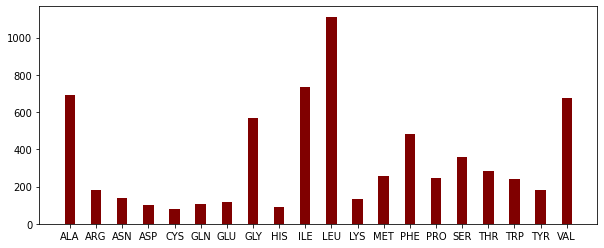

In [53]:
from collections import Counter

fig = plt.figure()
fig.set_figwidth(10)
k = Counter(three_helix_residue_name)
plt.bar(k.keys(),k.values(),  color ='maroon',
        width = 0.4)


In [39]:
# analyse ramachandran angles of broken regions
three_helix_count =0 ; 
pi_helix_count=0 ; 
protein_with_three_helix = 0 ; 
protein_with_pi_helix =0 ;
for ind_report in broken_membrane_report:
   # print(ind_report['pdb_id'])
    pdb_id = ind_report['pdb_id']
    ind_output_file = broken_membrane_dir + pdb_id[:-4] +".json"
    ind_output_file = json.load(open(ind_output_file))
    helix_list = ind_report['helices'];
    three_helix_flag =0 ; 
    pi_helix_flag =0 ; 
    for i,ind_helix in enumerate(helix_list): 
        ind_output_file_helix = ind_output_file[i]
        ramachandran_psi_list = ind_output_file_helix['psi_angles']
        ramachandran_phi_list = ind_output_file_helix['phi_angles']
        main_chain_res = ind_helix['membrane_bound_residues'];
        if(len(main_chain_res) > 0):
            broken_regions = ind_helix['broken_regions']; 
            if(len(broken_regions)):
                for broken_res_no in broken_regions:
                    continue


KeyError: 'psi_angles'

In [78]:
ind_output_file_helix

{'starting_residue_number': '  23',
 'ending_residue_number': '  31',
 'length': 9,
 'helix_S.No': ' 57',
 'helix_code': 'AG3',
 'chain_identifier': 'B',
 'helix_residues': ['ATOM   9030  N   CYS B  23      59.750   5.362  17.665  1.00 98.63           N  \n',
  'ATOM   9031  CA  CYS B  23      59.326   5.299  19.067  1.00 98.63           C  \n',
  'ATOM   9032  C   CYS B  23      60.338   5.026  20.190  1.00 98.63           C  \n',
  'ATOM   9033  O   CYS B  23      59.941   4.975  21.361  1.00 98.63           O  \n',
  'ATOM   9034  CB  CYS B  23      58.242   4.245  19.200  1.00 98.63           C  \n',
  'ATOM   9035  SG  CYS B  23      56.636   4.702  18.540  1.00 98.63           S  \n',
  'ATOM   9036  N   ASP B  24      61.632   4.908  19.888  1.00102.13           N  \n',
  'ATOM   9037  CA  ASP B  24      62.618   4.641  20.951  1.00102.13           C  \n',
  'ATOM   9038  C   ASP B  24      62.600   5.792  21.960  1.00102.13           C  \n',
  'ATOM   9039  O   ASP B  24      6

In [42]:
print("Number of broken residues stabilized by interacting with i + 3th residue", three_helix_count)
print("Number of broken residues stabilized by interacting with i + 5th residue", pi_helix_count)
print("Percentage of broken residues stabilized by interacting with i + 3th residue", (three_helix_count/broken_res_count) * 100)
print("NUmber of protein containing broken residues interacting with i + 3th residue", protein_with_three_helix)
print("Number of protein containing broken residues interacting with i + 5th residue", protein_with_pi_helix)
print("Percentage of protein containing broken residues interacting with i + 3th residue", (protein_with_three_helix/total_protein_count) * 100 )
print("Percentage of protein containing broken residues interacting with i + 5th residue", (protein_with_pi_helix/total_protein_count) * 100 )



Number of broken residues stabilized by interacting with i + 3th residue 6794
Number of broken residues stabilized by interacting with i + 5th residue 38
Percentage of broken residues stabilized by interacting with i + 3th residue 17.620665508208628
NUmber of protein containing broken residues interacting with i + 3th residue 575
Number of protein containing broken residues interacting with i + 5th residue 18
Percentage of protein containing broken residues interacting with i + 3th residue 86.72699849170438
Percentage of protein containing broken residues interacting with i + 5th residue 2.7149321266968327


In [ ]:
## analysis of ramachandran angles of broken helices stabilized by i , i + 3 interactions

In [9]:
# codes to analyse broken parts of alpha helices within the membrance
transmembrane_concise_report =  open('../outputs/brokenTransmembraneRegions/concise_report.json')
transmembrane_concise_report= json.load(transmembrane_concise_report)
del transmembrane_concise_report[-1]

In [10]:
broken_transmembrane_res_count_dict={}
no_pdb_ids = 0 ; 
no_broken_transmembrane_regions = 0 ; 

In [11]:
for ind_pdb in transmembrane_concise_report:
    no_pdb_ids = no_pdb_ids +1 ; 
    broken_region_list = ind_pdb['broken_transmembrane_regions']
    for ind_transmembrane_region in broken_region_list:
        no_broken_transmembrane_regions = no_broken_transmembrane_regions +1 ; 
        broken_residues = ind_transmembrane_region['broken_residues']
        prev_res_no= - 1; 
        for ind_res in broken_residues:
            res_no = int(ind_res[22:26])
            res_name = ind_res[17:20]
            if(res_no != prev_res_no):
                if(res_name not in broken_transmembrane_res_count_dict.keys()):
                    broken_transmembrane_res_count_dict[res_name]= 1;
                else:
                    broken_transmembrane_res_count_dict[res_name]= broken_transmembrane_res_count_dict[res_name] + 1; 
                   # print(res_no)
                prev_res_no= res_no;

In [12]:
print('Number of PDB ids analysed are',no_pdb_ids)
print('Total mumber of transmembrane which are broken ',no_broken_transmembrane_regions)

Number of PDB ids analysed are 676
Total mumber of transmembrane which are broken  7675


Text(0.5, 1.0, 'Number of amino acid involved in broken transmembrane regions')

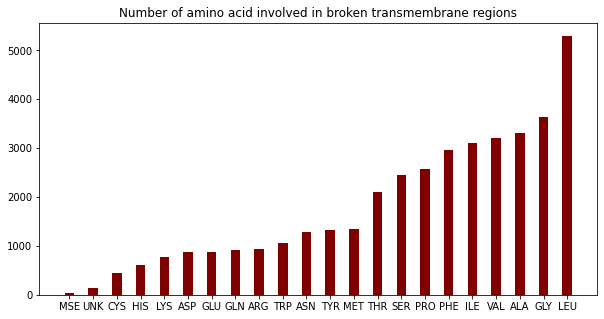

In [13]:
broken_transmembrane_res_count_dict =dict(sorted(broken_transmembrane_res_count_dict.items(), key=lambda kv: kv[1]))

amino_acid_labels = broken_transmembrane_res_count_dict.keys();
residues_in_broken_regions= broken_transmembrane_res_count_dict.values();
fig = plt.figure(figsize = (10, 5))
plt.bar(amino_acid_labels, residues_in_broken_regions, color ='maroon',
        width = 0.4)
ax = plt.gca()
ax.set_title("Number of amino acid involved in broken transmembrane regions")